# Random Forest

1. Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kavana\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\kavana\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
print(pd.__version__)

2.2.2


In [3]:
df = pd.read_excel('glass.xlsx', sheet_name = 1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape

(214, 10)

In [5]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
# checking for missing values
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [8]:
# checking for duplicates
print(df.duplicated().sum())

1


In [9]:
# dropping duplicates
df.drop_duplicates(inplace=True)

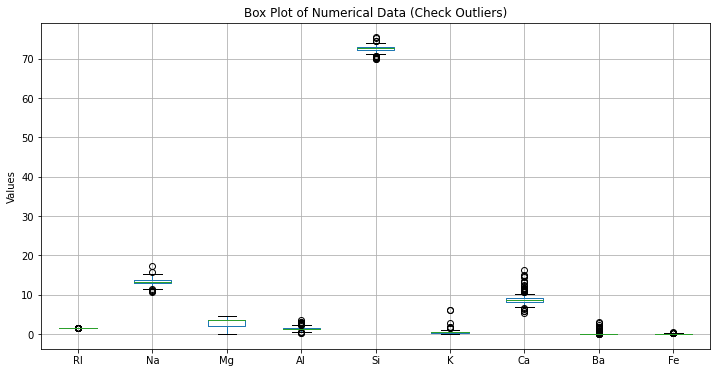

In [11]:
#checking for outliers

columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

plt.figure(figsize=(12, 6))
df[columns].boxplot()
plt.title("Box plot for numerical variables ")
plt.ylabel("Values")
plt.show()

In [12]:
#checking for inconsistencies in data
print(df['Type'].value_counts())

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64


2: Data Visualization

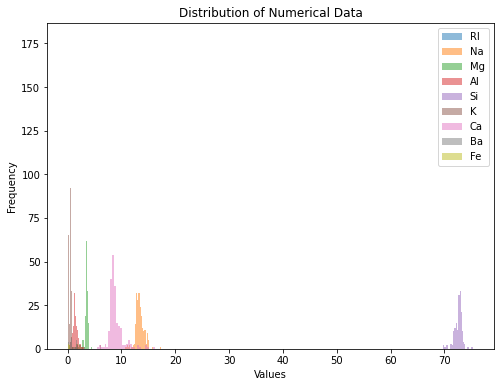

In [15]:
columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

plt.figure(figsize=(8,6))
for column in columns:
    plt.hist(df[column], bins=30, alpha=0.5, label=column)

plt.title('Distribution of Numerical Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

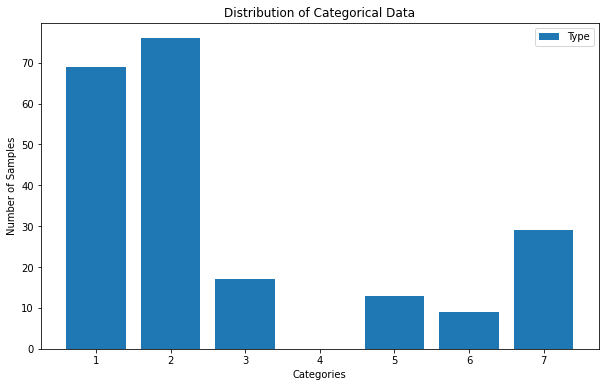

In [17]:
categorical_columns = ['Type']

plt.figure(figsize=(10, 6))
for column in categorical_columns:
    counts = df[column].value_counts()
    plt.bar(counts.index, counts.values, label=column)
plt.title('Distribution of Categorical Data')
plt.xlabel('Categories')
plt.ylabel('Number of Samples')
plt.legend(loc='upper right')
plt.show()

## Analyzing patterns and correlations observed in the data.

Histograms of Numerical Features:

we can observe the distributions of each numerical feature. Some features appear to be normally distributed (e.g., refractive index), while others show skewed distributions (e.g., calcium oxide content)

Box Plots of Numerical Features:

The box plots provide insights into the spread and distribution of each numerical feature. 

3: Data Preprocessing

In [25]:
# there are no missing values in data

df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [26]:
# there are no categorical variables to apply encoding

df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [42]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable



In [52]:
# applying feature scaling

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  #to balance the data (Synthetic Minority Over-sampling Technique)

x = df.drop(columns=['Type'])
y = df['Type']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_scaled, y)

print("Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after resampling:
Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


Random Forest Model Implementation

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# splitting the data into train test
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(random_state=42)
#training
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [54]:
#checking accuracy
accuracy = accuracy_score(y_test, y_pred)

In [56]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.94      0.89      0.92        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.95        92
weighted avg       0.95      0.95      0.95        92



In [57]:
#Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[14  1  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 18]]


In [58]:
# evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nEvaluation Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Evaluation Metrics:
Precision: 0.9473128019323671
Recall: 0.9456521739130435
F1-score: 0.9453762062457713


Bagging and Boosting Methods

In [67]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

#bagging classifier
bagging_classifier = BaggingClassifier(base_estimator=random_forest_classifier,
                                       n_estimators=100, random_state=42)
bagging_classifier.fit(x_train, y_train)

y_pred_bagging = bagging_classifier.predict(x_test)

#gradient boosting classifier initialize and train
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)
gradient_boosting_classifier.fit(x_train, y_train)

# predicting for boosting
y_pred_gradient_boosting = gradient_boosting_classifier.predict(x_test)

In [71]:
# Evaluation
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Accuracy (Bagging with Random Forest):", accuracy_bagging)

precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging= recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print("\nEvaluation Metrics for Bagging with Random Forest:")
print("Precision:", precision_bagging)
print("Recall:", recall_bagging)
print("F1-score:", f1_bagging)

Accuracy (Bagging with Random Forest): 0.9456521739130435

Evaluation Metrics for Bagging with Random Forest:
Precision: 0.9473128019323671
Recall: 0.9456521739130435
F1-score: 0.9453762062457713


In [70]:
# evaluation
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
print("Accuracy (Gradient Boosting):", accuracy_gradient_boosting)

precision_gradient_boosting = precision_score(y_test, y_pred_gradient_boosting, average='weighted')
recall_gradient_boosting = recall_score(y_test, y_pred_gradient_boosting, average='weighted')
f1_gradient_boosting = f1_score(y_test, y_pred_gradient_boosting, average='weighted')

print("\nEvaluation Metrics for Gradient Boosting:")
print("Precision:", precision_gradient_boosting)
print("Recall:", recall_gradient_boosting)
print("F1-score:", f1_gradient_boosting)

Accuracy (Gradient Boosting): 0.9239130434782609

Evaluation Metrics for Gradient Boosting:
Precision: 0.9312116778149387
Recall: 0.9239130434782609
F1-score: 0.9242856142667107


Insights:

Random Forest:
Accuracy: 94.57%
With an accuracy of 94.57%, Random Forest performed quite well on the dataset.


Bagging with Random Forest:
Accuracy: 94.57%
The accuracy obtained with bagging and random forest is the same as that of the random forest alone, indicating that bagging did not significantly improve the model's performance in this case.

Gradient Boosting:
Accuracy: 92.39%
While Gradient Boosting achieved a slightly lower accuracy compared to Random Forest, it still performed well with an accuracy of 92.39%.

Overall Insights:
Both Random Forest and Bagging with Random Forest achieved the same accuracy, suggesting that bagging did not provide additional benefits in this scenario.


# Additional Notes:

**1. Can you explain Bagging and Boosting methods? How are they different from each other?**
Both Bagging and Boosting are ensemble learning techniques used to improve the performance of machine learning models by combining multiple weak learners.

**Bagging (Bootstrap Aggregating):**
Bagging involves training multiple independent models in parallel, each on a random subset of the training data (with replacement).


**Boosting:**
Boosting focuses on building a sequence of models, where each subsequent model learns from the mistakes of its predecessor

while both Bagging and Boosting aim to improve model performance through ensemble learning, they differ in their training approach and how they leverage the training data to build the ensemble models.

**2. How do you handle imbalance in the data?**

**Resampling Techniques:**

**Oversampling:**

Increase the number of instances in the minority class by randomly duplicating them or generating synthetic samples (e.g., SMOTE - Synthetic Minority Over-sampling Technique).

**Undersampling:**

Reduce the number of instances in the majority class by randomly removing samples until the class distribution is balanced.
